# Houses' prices

## Exploring the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
houses_df = pd.read_csv('Housing.csv')

In [3]:
houses_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df = houses_df.copy()

In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There is no missing values in our data

## Dealing with object columns

In [6]:
object_cols = df.select_dtypes(include = ['object']).columns.tolist()
numerical_cols = df.select_dtypes(include = ['int', 'float']).columns.tolist()

object_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [7]:
for col in object_cols:
    print("the unique values of the {} column are : {}".format(col, df[col].unique()))

the unique values of the mainroad column are : ['yes' 'no']
the unique values of the guestroom column are : ['no' 'yes']
the unique values of the basement column are : ['no' 'yes']
the unique values of the hotwaterheating column are : ['no' 'yes']
the unique values of the airconditioning column are : ['yes' 'no']
the unique values of the prefarea column are : ['yes' 'no']
the unique values of the furnishingstatus column are : ['furnished' 'semi-furnished' 'unfurnished']


We'll deal first with the yes/no columns

In [8]:
yes_no_cols = [col for col in object_cols if col != 'furnishingstatus']

In [9]:
n_rows = df.shape[0]

In [10]:
def label_encode(col):
    for i in range(n_rows):
        if df.loc[i, col] == 'yes':
            df.loc[i, col] = 1
        else : 
            df.loc[i, col] = 0

In [11]:
for col in yes_no_cols:
    label_encode(col)

Then we'll deal with the `furnishingstatus`

In [12]:
for k in range(n_rows):
    if df.loc[k, 'furnishingstatus'] == 'furnished':
        df.loc[k, 'furnishingstatus'] = 1
    elif df.loc[k, 'furnishingstatus'] == 'semi-furnished':
        df.loc[k, 'furnishingstatus'] = 0.5
    else:
        df.loc[k, 'furnishingstatus'] = 0

In [13]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0.5
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


## Dealing with the numerical columns

In [14]:
numerical_cols

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

### Checking the normality of the data

Let's check if the price is normally distributed

'null hypothesis':The price is normally distributed

In [15]:
from scipy.stats import shapiro

In [16]:
x = df['price']

(array([19., 42., 79., 84., 88., 51., 47., 42., 28., 18., 12., 13.,  9.,
         4.,  3.,  1.,  1.,  0.,  3.,  1.]),
 array([ 1750000.,  2327500.,  2905000.,  3482500.,  4060000.,  4637500.,
         5215000.,  5792500.,  6370000.,  6947500.,  7525000.,  8102500.,
         8680000.,  9257500.,  9835000., 10412500., 10990000., 11567500.,
        12145000., 12722500., 13300000.]),
 <BarContainer object of 20 artists>)

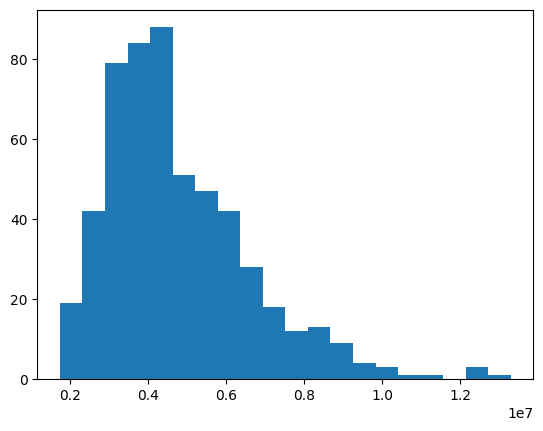

In [17]:
plt.hist(x, bins = 20)

In [18]:
def check_normality(y):
    stat, p_value = shapiro(y)
    
    print(f"P-value: {p_value}")

    alpha = 0.05

    if p_value < alpha:
        print("Reject the null hypothesis: The data is not normally distributed.")
    else:
        print("Fail to reject the null hypothesis: The data is normally distributed.")

In [19]:
check_normality(x)

P-value: 3.154903020052395e-16
Reject the null hypothesis: The data is not normally distributed.


In [20]:
x= np.log(x)

(array([ 8.,  5.,  7., 19., 22., 39., 59., 55., 61., 51., 53., 40., 42.,
        26., 21., 18., 10.,  4.,  1.,  4.]),
 array([14.37512635, 14.47653376, 14.57794117, 14.67934858, 14.780756  ,
        14.88216341, 14.98357082, 15.08497823, 15.18638564, 15.28779306,
        15.38920047, 15.49060788, 15.59201529, 15.69342271, 15.79483012,
        15.89623753, 15.99764494, 16.09905236, 16.20045977, 16.30186718,
        16.40327459]),
 <BarContainer object of 20 artists>)

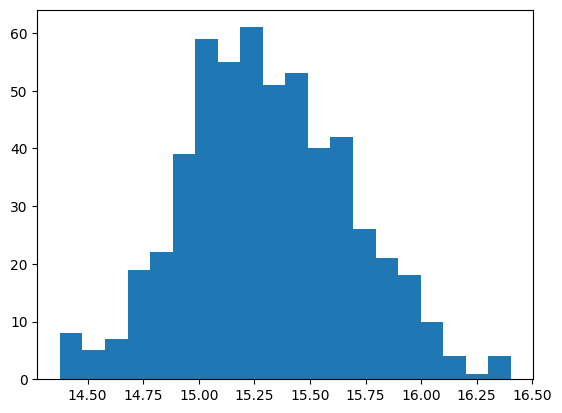

In [21]:
plt.hist(x, bins = 20)

In [22]:
check_normality(x)

P-value: 0.21183609067122433
Fail to reject the null hypothesis: The data is normally distributed.


In [23]:
df['price']=x

Let's now deal with the area

In [24]:
y = df['area']

(array([ 20.,  53., 105.,  93.,  47.,  70.,  56.,  32.,  23.,  16.,   8.,
          7.,   4.,   4.,   1.,   4.,   0.,   0.,   0.,   2.]),
 array([ 1650. ,  2377.5,  3105. ,  3832.5,  4560. ,  5287.5,  6015. ,
         6742.5,  7470. ,  8197.5,  8925. ,  9652.5, 10380. , 11107.5,
        11835. , 12562.5, 13290. , 14017.5, 14745. , 15472.5, 16200. ]),
 <BarContainer object of 20 artists>)

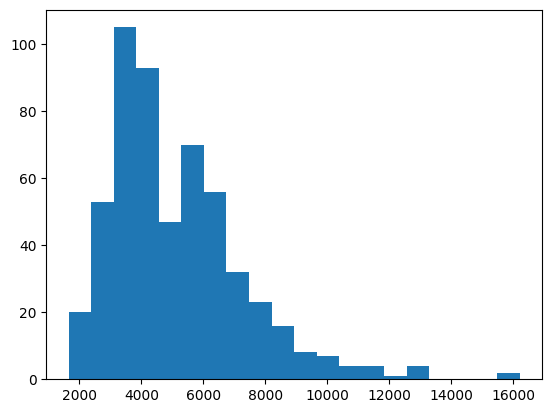

In [25]:
plt.hist(y, bins = 20)

We'll check if it is normally distributed

In [26]:
check_normality(y)

P-value: 2.5971521072657363e-17
Reject the null hypothesis: The data is not normally distributed.


We'll try the log transformation

In [27]:
y = np.log(y)

(array([ 3.,  5., 11.,  9., 21., 47., 68., 63., 50., 39., 32., 72., 48.,
        31., 21.,  8., 10.,  1.,  4.,  2.]),
 array([7.40853057, 7.52274236, 7.63695416, 7.75116596, 7.86537776,
        7.97958956, 8.09380135, 8.20801315, 8.32222495, 8.43643675,
        8.55064854, 8.66486034, 8.77907214, 8.89328394, 9.00749573,
        9.12170753, 9.23591933, 9.35013113, 9.46434293, 9.57855472,
        9.69276652]),
 <BarContainer object of 20 artists>)

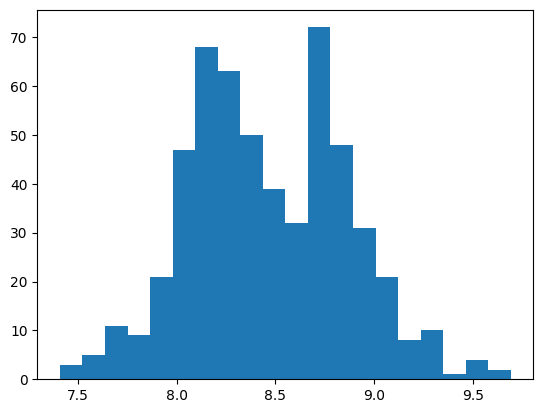

In [28]:
plt.hist(y, bins = 20 )

In [29]:
check_normality(y)

P-value: 0.011681468762063052
Reject the null hypothesis: The data is not normally distributed.


Let's try the box cox transformation

In [30]:
from scipy.stats import boxcox

In [31]:
y = df['area']

(array([ 8.,  5.,  7., 19., 22., 39., 59., 55., 61., 51., 53., 40., 42.,
        26., 21., 18., 10.,  4.,  1.,  4.]),
 array([14.37512635, 14.47653376, 14.57794117, 14.67934858, 14.780756  ,
        14.88216341, 14.98357082, 15.08497823, 15.18638564, 15.28779306,
        15.38920047, 15.49060788, 15.59201529, 15.69342271, 15.79483012,
        15.89623753, 15.99764494, 16.09905236, 16.20045977, 16.30186718,
        16.40327459]),
 <BarContainer object of 20 artists>)

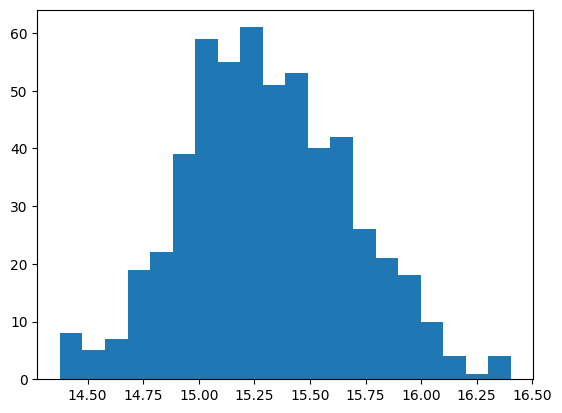

In [32]:
result = boxcox(y)

y=result[0]
lam = result[1]

plt.hist(x, bins = 20)

In [33]:
check_normality(y)

P-value: 0.028096061807653356
Reject the null hypothesis: The data is not normally distributed.


So we'll apply the boxcox transformation to the area

In [34]:
# Replace the area with the x

df['area'] = y

### Checking the correlations

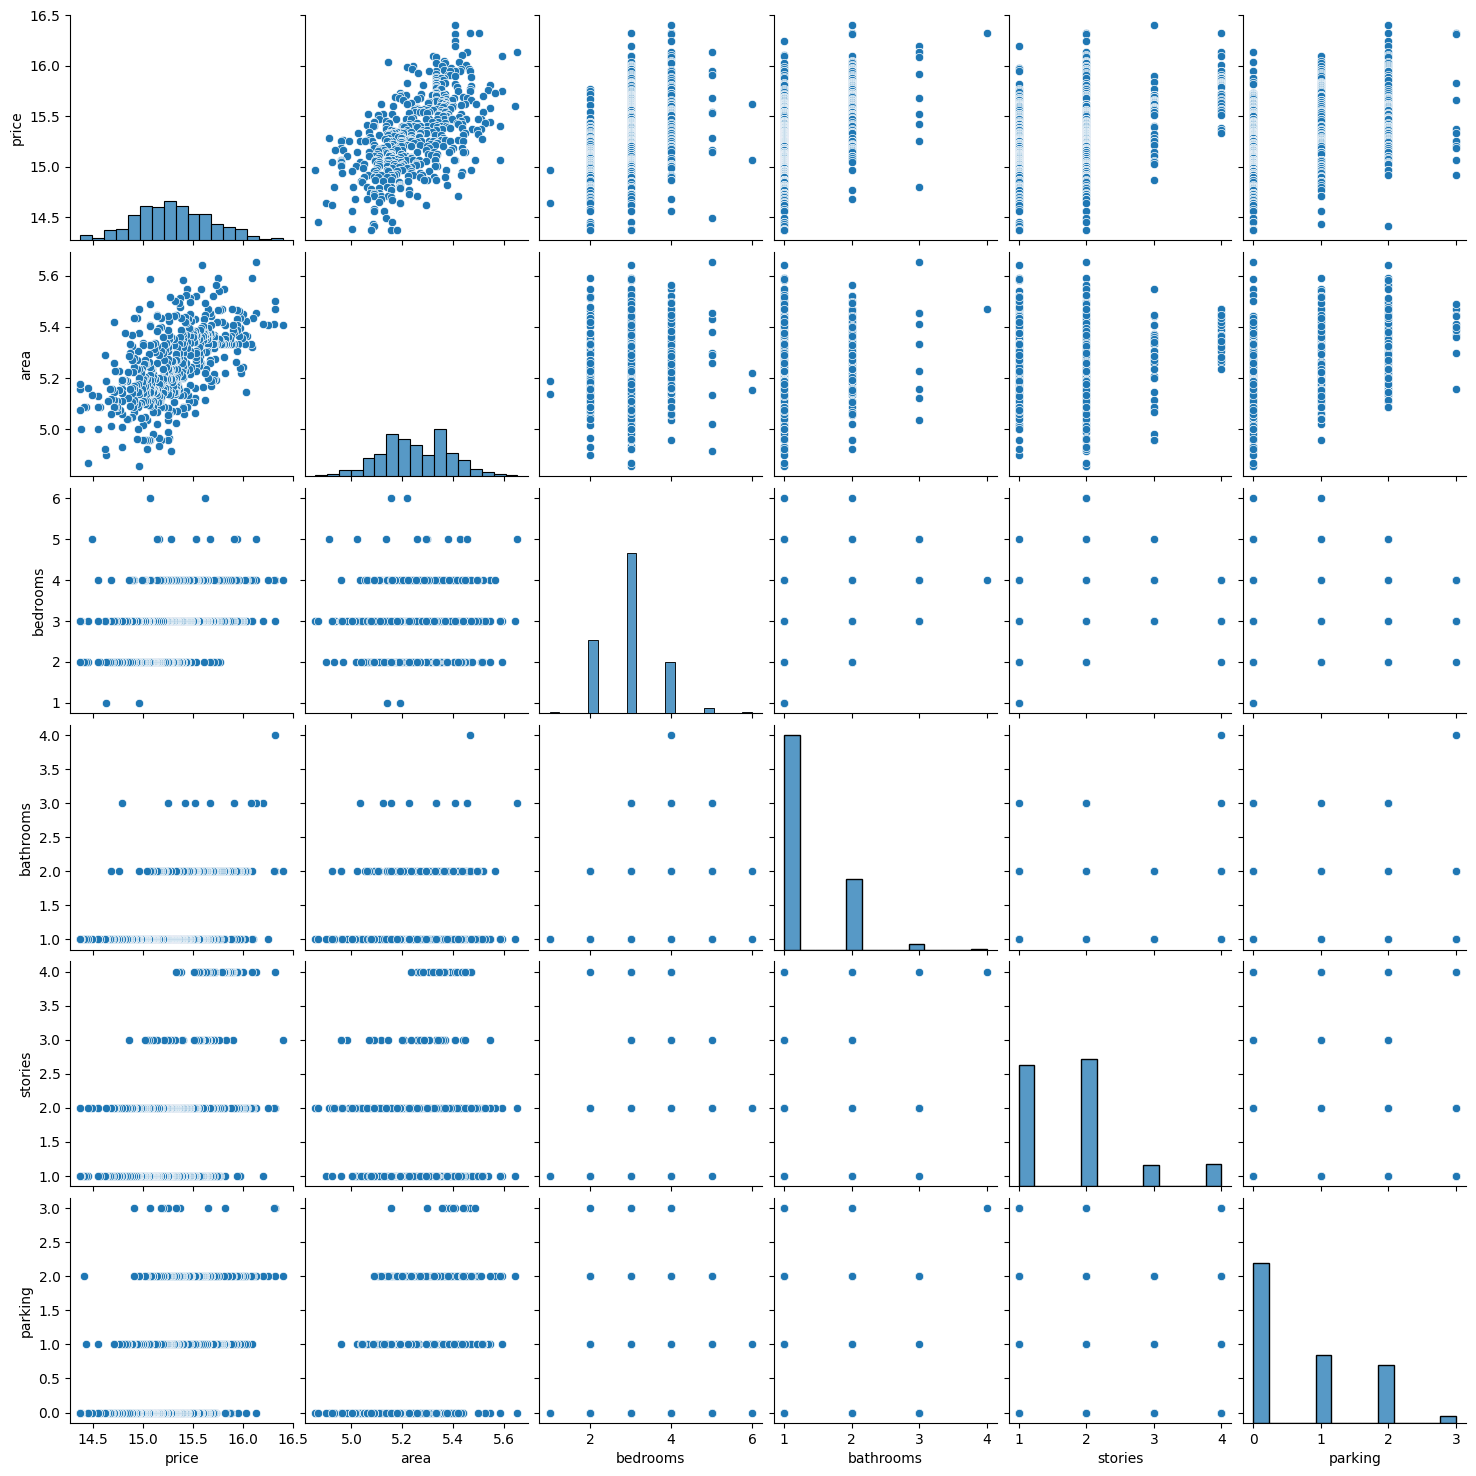

In [35]:
sns.pairplot(df[numerical_cols])

<Axes: xlabel='area', ylabel='price'>

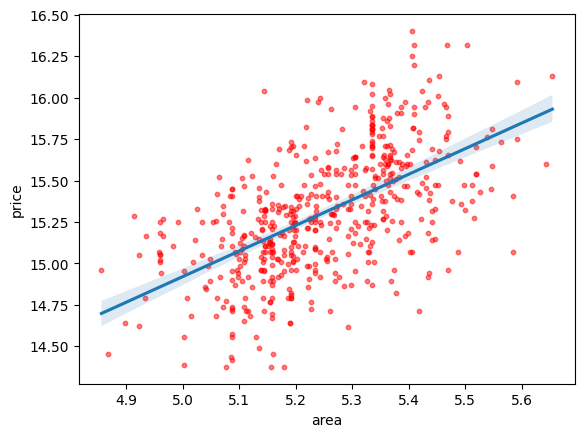

In [36]:
sns.regplot(x = df['area'], y = df['price'],
           scatter_kws={
        'color': 'red',  
        's': 10,          
        'alpha': 0.5,        
    })

<Axes: >

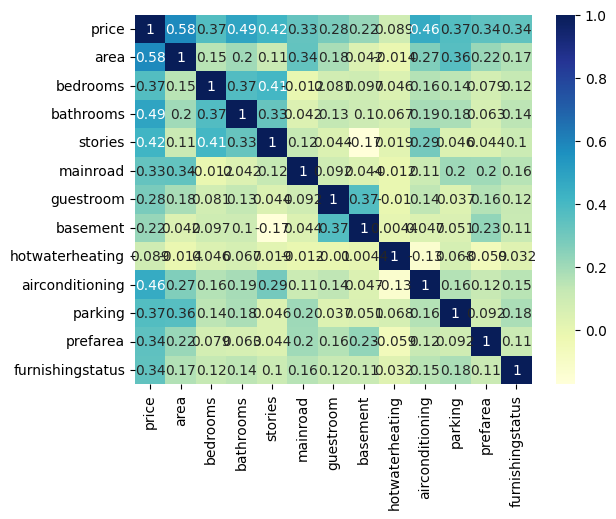

In [37]:
sns.heatmap(df.corr(),annot = True, cmap = 'YlGnBu')

We can see that the correlations between the price and the features are not strong

## Regression

Since we have some features that aren't highly correlated so we need to do feature selection, so we'll use the lasso regression

In [42]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop('price', axis = 1, inplace = False)
y = df['price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 72018)

In [48]:
estimator = Pipeline([('polynomial', PolynomialFeatures(degree = 2)),
                    ('scaler', StandardScaler()),
                    ('lasso', Lasso(alpha = 0.1))])

alphas = np.geomspace(1e-9,10, 11)

params = {
    'polynomial__degree': [1,2,3],
    'lasso__alpha':alphas
}

search = GridSearchCV(estimator, params, n_jobs = 1)

In [49]:
estimator.fit(X_train, y_train)

search.fit(X_test, y_test)

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.732e-01, tolerance: 1.797e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.431e-01, tolerance: 1.688e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

GridSearchCV(estimator=Pipeline(steps=[('polynomial', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('lasso', Lasso(alpha=0.1))]),
             n_jobs=1,
             param_grid={'lasso__alpha': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01]),
                         'polynomial__degree': [1, 2, 3]})

In [53]:
best = search.best_estimator_

y_train_pred = best.predict(X_train)
y_test_pred = best.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error

In [54]:
print("the mean squared error of the training set is {}".format(mean_squared_error(y_train, y_train_pred)))
print("the mean squared error of the test set is {}".format(mean_squared_error(y_test, y_test_pred)))

the mean squared error of the training set is 0.049404999227719515
the mean squared error of the test set is 0.029786034460876996
